In [1]:
import keras.utils
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization, Input, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os

In [2]:
from source.workers.reader import DataReader
from source.helpers.loader_factory import LoaderFactory
from source.workers.splitter import DataSplitter
from source.workers.scaler import DataScaler

# Load Data

In [3]:
data_folder_path = r'C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\data\datasets'

In [4]:
loader = LoaderFactory(folder_path=data_folder_path)
data_reader = DataReader(data_loader=loader)

In [5]:
raw_data = data_reader.read_data()

In [6]:
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
control_law,100938.0,-0.065589,4.975401,-10.000000,-1.706507,-0.032990,1.635560,10.000000
position_rotary_arm,100938.0,-0.025371,0.448112,-1.509437,-0.411107,-0.009204,0.303728,2.110758
position_pendulum_wrapped,100938.0,0.004265,1.433323,-3.141593,-0.788466,-0.009204,0.855961,3.138525
speed_rotary_arm,100938.0,-0.002084,3.327051,-13.648693,-1.049030,-0.004347,1.041877,15.827819
speed_pendulum,100938.0,0.202134,9.414936,-27.392518,-2.702186,0.102083,3.744968,27.456403


In [7]:
print(f'Shape: {raw_data.shape}')
print(f'Columns: {raw_data.columns}')

Shape: (100938, 5)
Columns: Index(['control_law', 'position_rotary_arm', 'position_pendulum_wrapped',
       'speed_rotary_arm', 'speed_pendulum'],
      dtype='object')


# Manage Raw Data

In [8]:
data_splitter = DataSplitter(dataset=raw_data)

In [9]:
train_data, train_target, validation_data, validation_target, test_data, test_target = data_splitter.split_data()

In [10]:
print("Forma de X_train:", train_data.shape)
print("Forma de y_train:", train_target.shape)
print("Forma de X_val:", validation_data.shape)
print("Forma de y_val:", validation_target.shape)
print("Forma de X_test:", test_data.shape)
print("Forma de y_test:", test_target.shape)

Forma de X_train: (64600, 4)
Forma de y_train: (64600, 1)
Forma de X_val: (16150, 4)
Forma de y_val: (16150, 1)
Forma de X_test: (20188, 4)
Forma de y_test: (20188, 1)


In [11]:
def plot_data(data: pd.DataFrame, title: str, init: int = 0, end:int = 200) -> None:
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
    axs = axs.flatten()

    for idx, column in enumerate(data.columns):
        axs[idx].plot(data[column][init:end])
        axs[idx].set_title(column)

    fig.subplots_adjust(hspace=0.4, wspace=0.6)
    fig.suptitle(title)

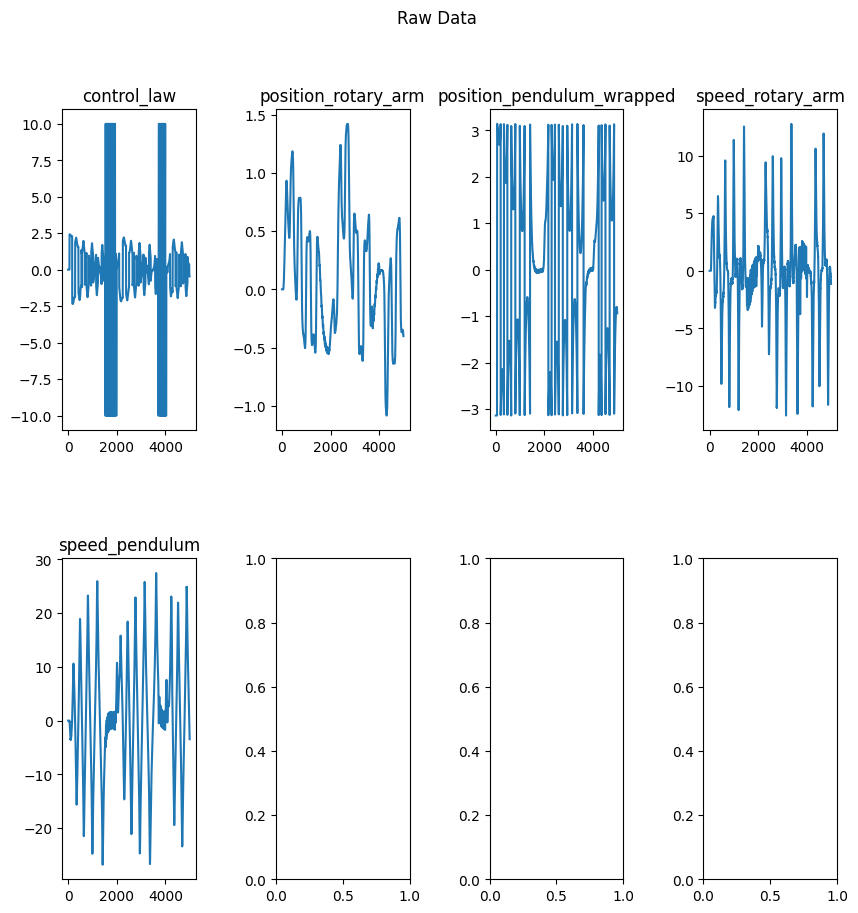

In [14]:
plot_data(raw_data, 'Raw Data', end=5000)

# Apply MinMaxScaler to Data

In [10]:
min_max_scaler = DataScaler(feature_range=(0, 1))

In [11]:
min_max_scaler.fit_scaler(train_data=train_data)

In [12]:
scaled_train_data = min_max_scaler.transform(data=train_data)
scaled_validation_data = min_max_scaler.transform(data=validation_data)
scaled_test_data = min_max_scaler.transform(data=test_data)

In [19]:
# columns_to_scale = [column for column in data.columns]

# min_max_scaler = MinMaxScaler(feature_range=(0, 1))
# data_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(data), column =columns_to_scale)

# scaled_train_data, scaled_test_data, train_label, test_label = train_test_split(data_min_max_scaled, labels, test_size=0.2, shuffle=False)
# scaled_train_data, scaled_val_data, train_label, val_label = train_test_split(scaled_train_data, train_label, test_size=0.2, shuffle=False)

In [14]:
scaled_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
set_point_rotary_arm,32000000.0,0.500000,0.500000,0.0,0.000000,0.500000,1.000000,1.0
position_rotary_arm,32000000.0,0.500003,0.418187,0.0,0.073392,0.498675,0.926619,1.0
position_pendulum_wrapped,32000000.0,0.500006,0.103861,0.0,0.496258,0.500006,0.503754,1.0
speed_rotary_arm,32000000.0,0.500000,0.163647,0.0,0.497656,0.499999,0.502341,1.0
speed_pendulum,32000000.0,0.500000,0.052474,0.0,0.499341,0.500000,0.500659,1.0


In [13]:
print("Forma de X_train:", scaled_train_data.shape)
print("Forma de y_train:", train_target.shape)
print("Forma de X_val:", scaled_validation_data.shape)
print("Forma de y_val:", validation_target.shape)
print("Forma de X_test:", scaled_test_data.shape)
print("Forma de y_test:", test_target.shape)

Forma de X_train: (32000000, 5)
Forma de y_train: (32000000, 1)
Forma de X_val: (8000000, 5)
Forma de y_val: (8000000, 1)
Forma de X_test: (10000001, 5)
Forma de y_test: (10000001, 1)


# Apply StandardScaler to Data

In [14]:
standard_scaler = StandardScaler()
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(data), columns=columns_to_scale)

In [15]:
data_standard_scaled.columns

Index(['setpoint_rotary_arm', 'position_rotary_arm',
       'position_pendulum_wrapped', 'speed_rotary_arm', 'speed_pendulum',
       'position_pendulum'],
      dtype='object')

In [16]:
important_standard_scaled_data = data_standard_scaled.drop(data_standard_scaled.columns[data_standard_scaled.columns.isin(['position_pendulum', 'speed_pendulum', 'speed_rotary_arm'])], axis=1)

standard_scaled_train_data, standard_scaled_test_data, train_label, test_label = train_test_split(important_standard_scaled_data, labels, test_size=0.2, shuffle=False)
standard_scaled_train_data, standard_scaled_val_data, train_label, val_label = train_test_split(standard_scaled_train_data, train_label, test_size=0.2, shuffle=False)

In [17]:
print("Forma de X_train:", standard_scaled_train_data.shape)
print("Forma de y_train:", train_label.shape)
print("Forma de X_val:", standard_scaled_val_data.shape)
print("Forma de y_val:", val_label.shape)
print("Forma de X_test:", standard_scaled_test_data.shape)
print("Forma de y_test:", test_label.shape)

Forma de X_train: (32000000, 3)
Forma de y_train: (32000000,)
Forma de X_val: (8000000, 3)
Forma de y_val: (8000000,)
Forma de X_test: (10000001, 3)
Forma de y_test: (10000001,)


In [18]:
# train_dataset = complete_data.sample(frac= 0.8, random_state=0)
# train_labels = train_dataset.pop('control_law')
# test_dataset = complete_data.drop(train_dataset.index)
# test_labels = test_dataset.pop('control_law')

# Build, Compile and Train the Model

In [11]:
def build_model():
    model = Sequential()
    model.add(Input(shape=(train_data.shape[1], )))
    model.add(Dense(units=16,
                    activation='relu'))
    model.add(Dense(units=8,
                    activation='relu'))
    model.add(Dense(units=4,
                    activation='relu'))
    model.add(Dense(units=1,
                    activation='linear'))

    return model

In [11]:
def build_advanced_model():
    inputs = Input(shape=(train_data.shape[1], ))
    x = Dense(units=8,
              activation='relu')(inputs)
    x = Dense(units=4,
              activation='relu')(x)
    outputs = Dense(units=1,
                    activation='linear')(x)
    model = keras.Model(inputs=inputs,
                        outputs=outputs)
    return model

In [12]:
# advanced_model = build_advanced_model()
# keras.utils.plot_model(advanced_model, show_shapes=True)

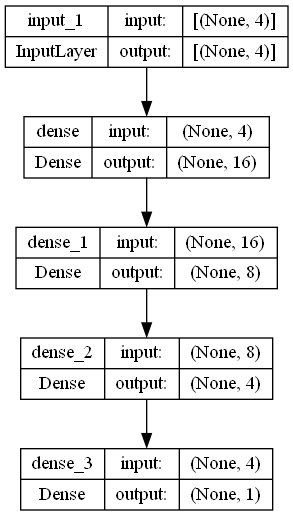

In [12]:
model = build_model()
keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

In [27]:
# advanced_model.compile(loss=tf.keras.losses.mse,
#               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               metrics=['accuracy', 'mae'])

In [20]:
model_name = 'swing_up_real'
checkpoint_dir = rf'C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_{model_name}'

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir,
                                                         save_best_only=True)

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                       patience=5,
                                                       verbose=1)

In [21]:
EPOCHS = 100
BATCH_SIZE = 256
retrain_model = False

In [22]:
if retrain_model:
    model.load_weights(checkpoint_dir)

In [24]:
history = model.fit(train_data.values,
                    train_target.values,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(validation_data.values, validation_target.values),
                    callbacks=[checkpoint_callback, early_stop_callback],
                    verbose=1,
                    shuffle=False)

Epoch 1/100
207/253 [=======================>......] - ETA: 0s - loss: 21.7303 - mae: 3.0809

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 2s 4ms/step - loss: 23.4370 - mae: 3.2721 - val_loss: 26.9052 - val_mae: 3.8588
Epoch 2/100
248/253 [============================>.] - ETA: 0s - loss: 19.5627 - mae: 2.9800

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 19.9470 - mae: 3.0267 - val_loss: 23.1171 - val_mae: 3.6114
Epoch 3/100
188/253 [=====================>........] - ETA: 0s - loss: 17.2136 - mae: 2.8001

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 17.9751 - mae: 2.8936 - val_loss: 20.5565 - val_mae: 3.3754
Epoch 4/100
216/253 [========================>.....] - ETA: 0s - loss: 15.1964 - mae: 2.6192

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 16.1714 - mae: 2.7561 - val_loss: 17.8519 - val_mae: 3.1470
Epoch 5/100
214/253 [========================>.....] - ETA: 0s - loss: 13.3946 - mae: 2.4890

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 14.2203 - mae: 2.6155 - val_loss: 14.8068 - val_mae: 2.8485
Epoch 6/100
218/253 [========================>.....] - ETA: 0s - loss: 11.8850 - mae: 2.3519

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 12.3511 - mae: 2.4436 - val_loss: 11.9828 - val_mae: 2.5335
Epoch 7/100
219/253 [========================>.....] - ETA: 0s - loss: 10.4995 - mae: 2.2071

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 10.7386 - mae: 2.2759 - val_loss: 9.6748 - val_mae: 2.2468
Epoch 8/100
216/253 [========================>.....] - ETA: 0s - loss: 9.6111 - mae: 2.0937 

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 4ms/step - loss: 9.5667 - mae: 2.1282 - val_loss: 8.0291 - val_mae: 2.0026
Epoch 9/100
196/253 [======================>.......] - ETA: 0s - loss: 8.9711 - mae: 1.9994

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 8.6516 - mae: 1.9908 - val_loss: 6.8416 - val_mae: 1.8007
Epoch 10/100
199/253 [======================>.......] - ETA: 0s - loss: 8.2658 - mae: 1.8873

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 7.8872 - mae: 1.8689 - val_loss: 6.0625 - val_mae: 1.6441
Epoch 11/100
217/253 [========================>.....] - ETA: 0s - loss: 7.5877 - mae: 1.7621

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 7.3416 - mae: 1.7701 - val_loss: 5.6054 - val_mae: 1.5404
Epoch 12/100
216/253 [========================>.....] - ETA: 0s - loss: 7.2209 - mae: 1.6937

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 6.9347 - mae: 1.6944 - val_loss: 5.2946 - val_mae: 1.4607
Epoch 13/100
216/253 [========================>.....] - ETA: 0s - loss: 6.9011 - mae: 1.6336

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 6.6123 - mae: 1.6327 - val_loss: 5.0566 - val_mae: 1.3938
Epoch 14/100
218/253 [========================>.....] - ETA: 0s - loss: 6.5861 - mae: 1.5820

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 6.3437 - mae: 1.5838 - val_loss: 4.8668 - val_mae: 1.3219
Epoch 15/100
218/253 [========================>.....] - ETA: 0s - loss: 6.3165 - mae: 1.5343

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 6.0691 - mae: 1.5333 - val_loss: 4.6543 - val_mae: 1.2910
Epoch 16/100
196/253 [======================>.......] - ETA: 0s - loss: 6.1216 - mae: 1.5225

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 5.7878 - mae: 1.5002 - val_loss: 4.4698 - val_mae: 1.2748
Epoch 17/100
199/253 [======================>.......] - ETA: 0s - loss: 5.8356 - mae: 1.4882

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 4ms/step - loss: 5.5031 - mae: 1.4636 - val_loss: 4.3240 - val_mae: 1.2632
Epoch 18/100
220/253 [=========================>....] - ETA: 0s - loss: 5.4518 - mae: 1.4356

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 5.2564 - mae: 1.4318 - val_loss: 4.1523 - val_mae: 1.2329
Epoch 19/100
221/253 [=========================>....] - ETA: 0s - loss: 5.1975 - mae: 1.4053

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 5.0248 - mae: 1.4015 - val_loss: 3.9781 - val_mae: 1.2019
Epoch 20/100
217/253 [========================>.....] - ETA: 0s - loss: 5.0483 - mae: 1.3917

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 4.8047 - mae: 1.3741 - val_loss: 3.8239 - val_mae: 1.1793
Epoch 21/100
221/253 [=========================>....] - ETA: 0s - loss: 4.7665 - mae: 1.3634

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 4.5973 - mae: 1.3523 - val_loss: 3.6723 - val_mae: 1.1680
Epoch 22/100
203/253 [=======================>......] - ETA: 0s - loss: 4.6027 - mae: 1.3533

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 4.3711 - mae: 1.3244 - val_loss: 3.5124 - val_mae: 1.1522
Epoch 23/100
203/253 [=======================>......] - ETA: 0s - loss: 4.3804 - mae: 1.3256

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 4.1598 - mae: 1.2959 - val_loss: 3.3686 - val_mae: 1.1388
Epoch 24/100
197/253 [======================>.......] - ETA: 0s - loss: 4.1864 - mae: 1.3008

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 3.9695 - mae: 1.2711 - val_loss: 3.2466 - val_mae: 1.1287
Epoch 25/100
216/253 [========================>.....] - ETA: 0s - loss: 4.0100 - mae: 1.2746

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 4ms/step - loss: 3.7978 - mae: 1.2487 - val_loss: 3.1356 - val_mae: 1.1166
Epoch 26/100
233/253 [==========================>...] - ETA: 0s - loss: 3.7052 - mae: 1.2288

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 3.6264 - mae: 1.2225 - val_loss: 3.0282 - val_mae: 1.1003
Epoch 27/100
218/253 [========================>.....] - ETA: 0s - loss: 3.6400 - mae: 1.2236

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 3.4650 - mae: 1.1979 - val_loss: 2.9407 - val_mae: 1.0860
Epoch 28/100
222/253 [=========================>....] - ETA: 0s - loss: 3.4395 - mae: 1.1932

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 3.3215 - mae: 1.1762 - val_loss: 2.8758 - val_mae: 1.0748
Epoch 29/100
238/253 [===========================>..] - ETA: 0s - loss: 3.2320 - mae: 1.1594

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 3.1971 - mae: 1.1554 - val_loss: 2.8206 - val_mae: 1.0634
Epoch 30/100
221/253 [=========================>....] - ETA: 0s - loss: 3.2086 - mae: 1.1574

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 3.0922 - mae: 1.1372 - val_loss: 2.7832 - val_mae: 1.0556
Epoch 31/100
218/253 [========================>.....] - ETA: 0s - loss: 3.1384 - mae: 1.1465

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.9946 - mae: 1.1198 - val_loss: 2.7498 - val_mae: 1.0476
Epoch 32/100
216/253 [========================>.....] - ETA: 0s - loss: 3.0537 - mae: 1.1297

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.9001 - mae: 1.1014 - val_loss: 2.7124 - val_mae: 1.0393
Epoch 33/100
213/253 [========================>.....] - ETA: 0s - loss: 2.9573 - mae: 1.1124

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 4ms/step - loss: 2.8147 - mae: 1.0840 - val_loss: 2.6944 - val_mae: 1.0371
Epoch 34/100
202/253 [======================>.......] - ETA: 0s - loss: 2.8979 - mae: 1.1031

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.7491 - mae: 1.0703 - val_loss: 2.6783 - val_mae: 1.0328
Epoch 35/100
218/253 [========================>.....] - ETA: 0s - loss: 2.8112 - mae: 1.0824

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.6956 - mae: 1.0590 - val_loss: 2.6706 - val_mae: 1.0308
Epoch 36/100
216/253 [========================>.....] - ETA: 0s - loss: 2.7783 - mae: 1.0730

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.6496 - mae: 1.0481 - val_loss: 2.6661 - val_mae: 1.0275
Epoch 37/100
253/253 [==============================] - 0s 905us/step - loss: 2.6083 - mae: 1.0377 - val_loss: 2.6668 - val_mae: 1.0249
Epoch 38/100
253/253 [==============================] - 0s 914us/step - loss: 2.5690 - mae: 1.0267 - val_loss: 2.6664 - val_mae: 1.0213
Epoch 39/100
253/253 [==============================] - 0s 937us/step - loss: 2.5377 - mae: 1.0174 - val_loss: 2.6662 - val_mae: 1.0187
Epoch 40/100
218/253 [========================>.....] - ETA: 0s - loss: 2.6097 - mae: 1.0278

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.5101 - mae: 1.0085 - val_loss: 2.6652 - val_mae: 1.0156
Epoch 41/100
192/253 [=====================>........] - ETA: 0s - loss: 2.6559 - mae: 1.0350

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.4847 - mae: 1.0000 - val_loss: 2.6513 - val_mae: 1.0071
Epoch 42/100
190/253 [=====================>........] - ETA: 0s - loss: 2.6338 - mae: 1.0255

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.4618 - mae: 0.9918 - val_loss: 2.6413 - val_mae: 1.0001
Epoch 43/100
218/253 [========================>.....] - ETA: 0s - loss: 2.5389 - mae: 1.0035

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.4412 - mae: 0.9846 - val_loss: 2.6409 - val_mae: 0.9969
Epoch 44/100
215/253 [========================>.....] - ETA: 0s - loss: 2.5351 - mae: 0.9992

INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


INFO:tensorflow:Assets written to: C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\tmp\checkpoint_swing_up_real\assets


253/253 [==============================] - 1s 3ms/step - loss: 2.4233 - mae: 0.9783 - val_loss: 2.6396 - val_mae: 0.9940
Epoch 45/100
253/253 [==============================] - 0s 915us/step - loss: 2.4061 - mae: 0.9724 - val_loss: 2.6396 - val_mae: 0.9925
Epoch 46/100
253/253 [==============================] - 0s 923us/step - loss: 2.3905 - mae: 0.9671 - val_loss: 2.6420 - val_mae: 0.9919
Epoch 47/100
253/253 [==============================] - 0s 988us/step - loss: 2.3760 - mae: 0.9624 - val_loss: 2.6437 - val_mae: 0.9916
Epoch 48/100
253/253 [==============================] - 0s 928us/step - loss: 2.3629 - mae: 0.9575 - val_loss: 2.6443 - val_mae: 0.9902
Epoch 49/100
253/253 [==============================] - 0s 912us/step - loss: 2.3504 - mae: 0.9531 - val_loss: 2.6451 - val_mae: 0.9894
Epoch 49: early stopping


In [20]:
model.get_weights()

[array([[ 0.3849631 ,  0.36455053, -0.18348569, -0.25858933,  0.20845348,
          0.4341777 ,  0.1894198 ,  0.41314727, -0.3965223 ,  0.08271998,
          0.33341515,  0.39293844, -0.51846874,  0.170672  ,  0.23567486,
         -0.3980596 ],
        [-0.16077116, -0.46103567, -0.32413238,  0.15853906,  0.463979  ,
         -0.12807384,  0.02651584, -0.4420137 ,  0.08933306,  0.40930492,
         -0.11580798,  0.43358076,  0.51231676, -0.37669212,  0.23828036,
          0.30397534],
        [-0.23379686, -0.20324528,  0.08433563,  0.36422044,  0.25482464,
         -0.30773354,  0.43957567,  0.10650128, -0.37641698,  0.47552723,
         -0.35377532,  0.29090482,  0.44008785,  0.04914433,  0.18365479,
          0.31120092],
        [-0.20438713,  0.24421525, -0.02881831, -0.4091599 , -0.01654428,
         -0.3785702 ,  0.23923832,  0.13176793, -0.05205405, -0.17248645,
          0.2799809 , -0.25406316, -0.40026253, -0.29564548, -0.41801253,
          0.46406937],
        [-0.42489213

In [25]:
test_loss, test_mae = model.evaluate(test_data, test_target)
print(f'Loss = {test_loss}\n MSE = {test_mae}')

631/631 [==============================] - 0s 604us/step - loss: 1.8178 - mae: 0.8407
Loss = 1.817826509475708
 MSE = 0.8407487869262695


In [26]:
predictions = model.predict(test_data.values)

631/631 [==============================] - 0s 540us/step


In [27]:
test_label_series = test_target.reset_index(drop=True)

In [28]:
test_label_series

,control_law
0,-1.789619
1,-1.799524
2,-1.809353
3,-1.819108
4,-1.827531
...,...
20183,6.886008
20184,9.883266
20185,10.000000
20186,9.367737


In [30]:
predictions_dataframe = pd.DataFrame(predictions, index=None)

In [31]:
predictions_dataframe

,0
0,-1.284077
1,-1.278054
2,-1.273290
3,-1.269659
4,-1.270681
...,...
20183,7.408186
20184,9.222316
20185,9.413616
20186,9.065416


In [32]:
compare_test_predict = pd.DataFrame({'label': test_label_series, 'prediction': predictions_dataframe}, index=None)

ValueError: If using all scalar values, you must pass an index

In [ ]:
compare_test_predict

In [33]:
model_folder_path = r'C:\PROGRAMACION\PENDULO INVERTIDO\Pendulo Invertido Diego\Python-Furuta-Pendulum\data\models'
model_name = 'swing_up_real.h5'

In [34]:
model_save_path = os.path.join(model_folder_path, model_name)

In [35]:
model.save(model_save_path)

In [ ]:
# tf.saved_model.save(model, r'C:\Users\diego\OneDrive\Documentos\PENDULO INVERTIDO\Pendulo Invertido Diego\PenduloInvertidoGit\Python\models')

In [36]:
def plot_loss_comparation(history):
  loss = history.history.get('loss')
  validation_loss = history.history.get('val_loss')
  epochs = range(1, len(loss) + 1, 1)

  plt.plot(epochs, loss, 'r--', label='Training loss')
  plt.plot(epochs, validation_loss, 'b', label='Validation loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.title('Training loss vs Validation loss')

  plt.legend()
  plt.show()

In [42]:
def plot_accuracy_comparation(history):
  accuracy = history.history.get('mae')
  validation_accuracy = history.history.get('val_,ae')
  epochs = range(1, len(accuracy) + 1, 1)

  plt.plot(epochs, accuracy, 'r--', label='Training MAE')
  plt.plot(epochs, validation_accuracy, 'b', label='Validation MAE')
  plt.ylabel('MAE')
  plt.xlabel('Epochs')
  plt.title('Training MAE vs Validation MAE')

  plt.legend()
  plt.show()

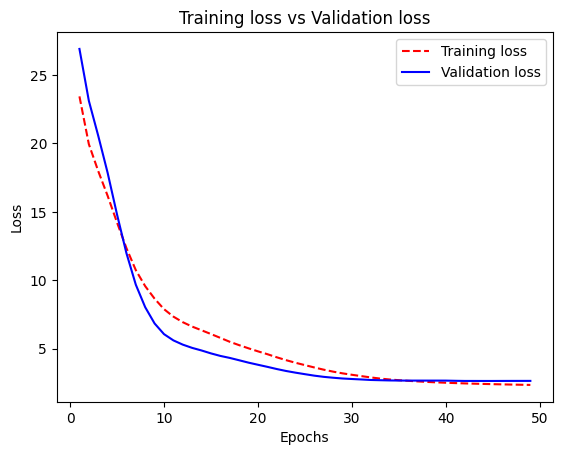

In [37]:
plot_loss_comparation(history=history)

ValueError: x, y, and format string must not be None

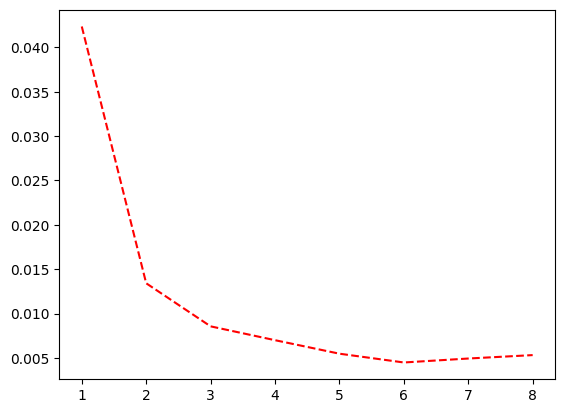

In [44]:
plot_accuracy_comparation(history=history)

In [ ]:
tf.saved_model.load(r'C:\Users\diego\OneDrive\Documentos\PENDULO INVERTIDO\Pendulo Invertido Diego\PenduloInvertidoGit\Python\source')